<a href="https://colab.research.google.com/github/hsiiyun/Intelligent-Systems-HW1/blob/main/Microwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Full Defuzzification Results (Tables)
 Index (Rows): Temperature (°C, x) | Columns: Weight (kg, y)

--- [Full Table 1] Center of Gravity (COG) - Power (Watt) ---
 (Full table output is commented out to save space)

--- [Full Table 2] Center of Gravity (COG) - Time (Min) ---
 (Full table output is commented out to save space)

--- [Full Table 3] Mean of Maximum (MOM) - Power (Watt) ---
 (Full table output is commented out to save space)

--- [Full Table 4] Mean of Maximum (MOM) - Time (Min) ---
 (Full table output is commented out to save space)

--- [Full Table 5] Modified MOM (Middle of Maximum) - Power (Watt) ---
 (Full table output is commented out to save space)

--- [Full Table 6] Modified MOM (Middle of Maximum) - Time (Min) ---
 (Full table output is commented out to save space)

--- [Full Table 7] Center of Area (CA) - Power (Watt) ---
 (Full table output is commented out to save space)

--- [Full Table 8] Center of Area (CA) - Time (Min) ---
 (Full table output is commented o

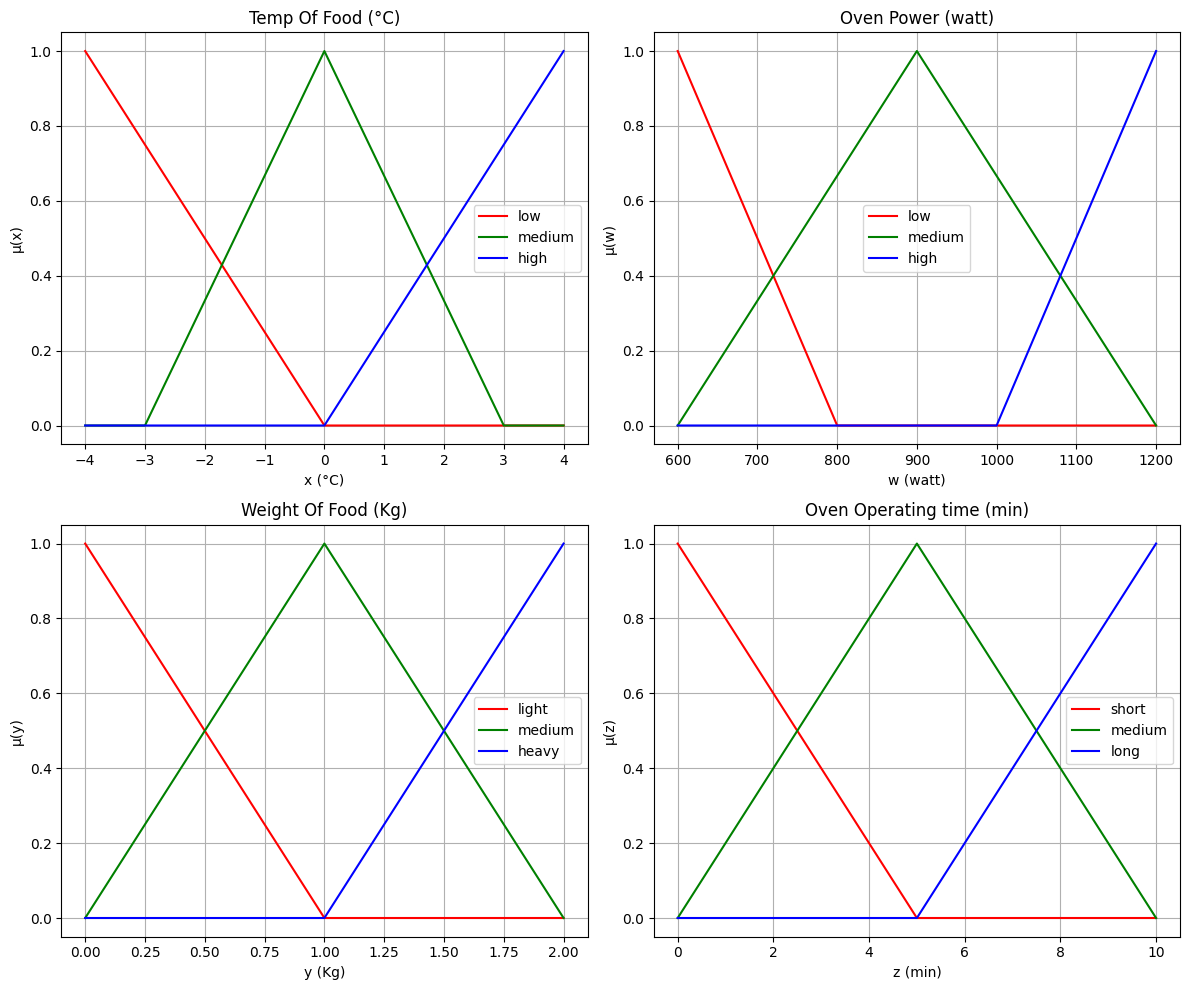

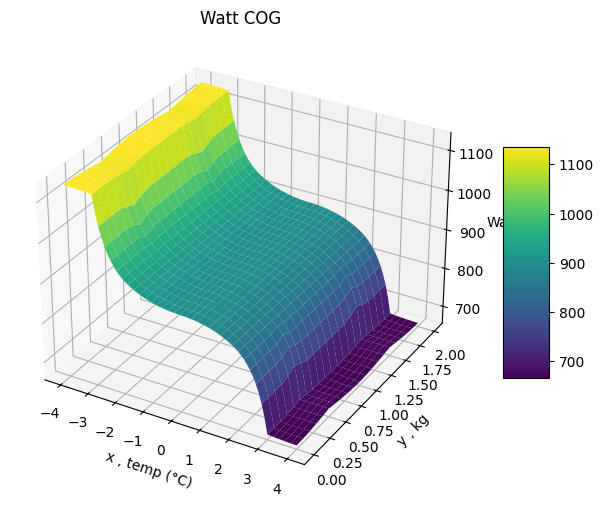

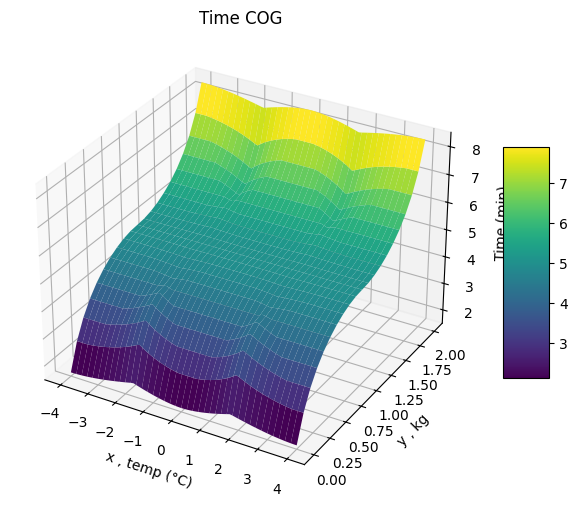

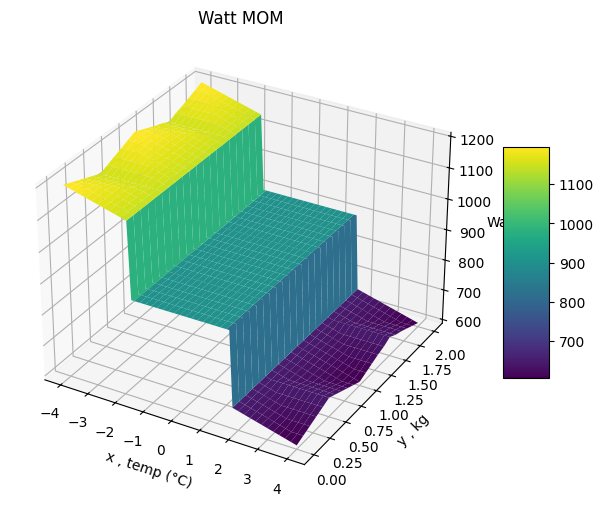

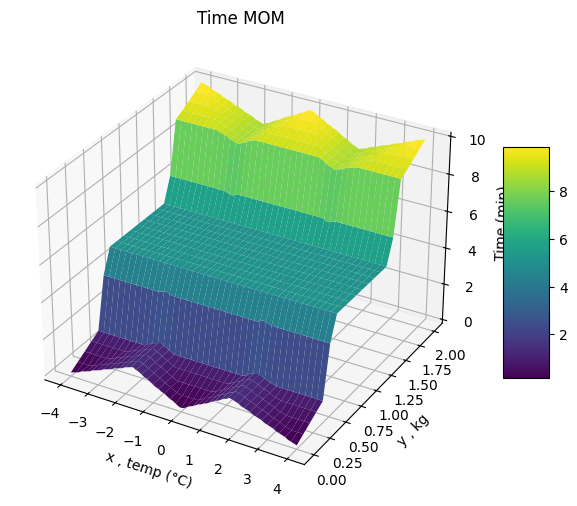

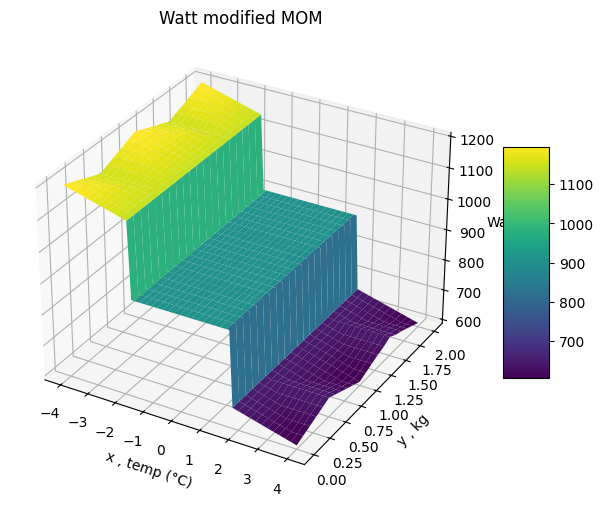

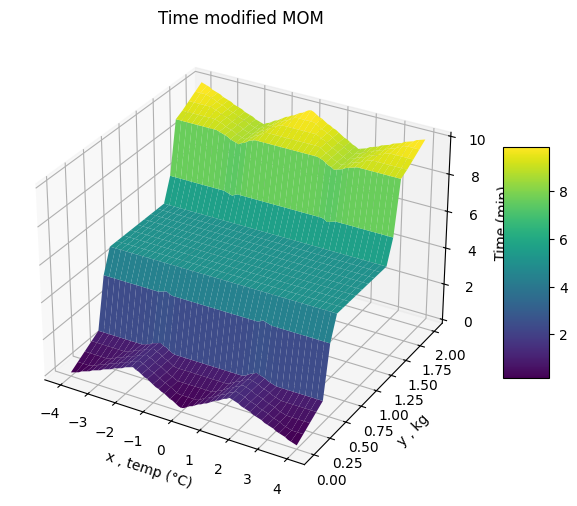

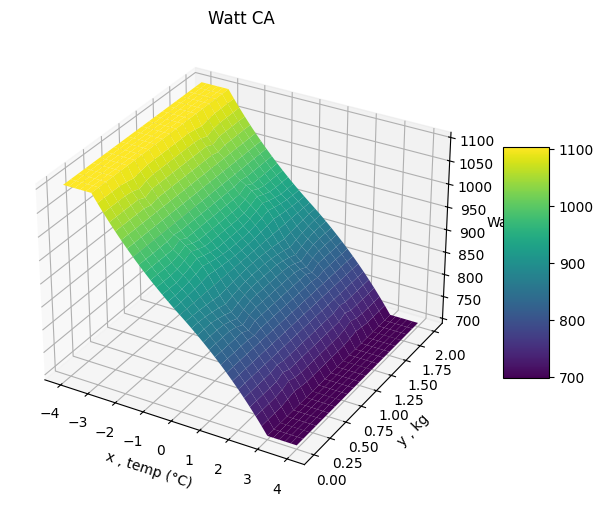

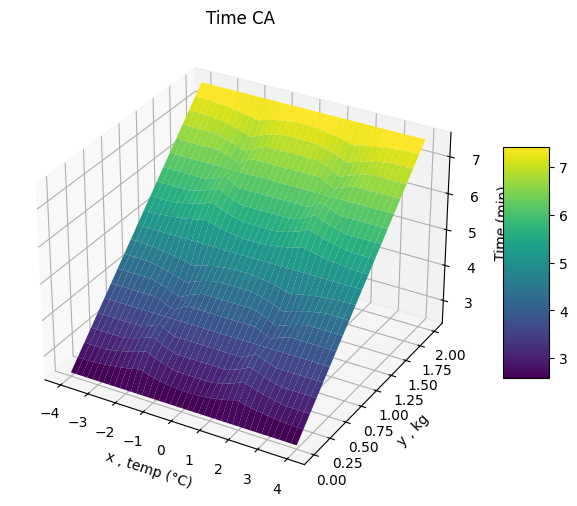

In [ ]:
# -*- coding: utf-8 -*-
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd # Import pandas
import warnings

# Suppress RuntimeWarnings (like division by zero) if desired,
# but it's often better to see them during development.
# warnings.filterwarnings("ignore", category=RuntimeWarning)

# --- Define Input Ranges ---
x = np.arange(-4, 4 + 0.1, 0.1)  # Temperature (°C)
y = np.arange(0, 2 + 0.1, 0.1)   # Weight (kg)
w = np.arange(600, 1200 + 5, 5)  # Power (watt)
z = np.arange(0, 10 + 0.1, 0.1)  # Time (min)

# Round inputs for clearer table labels
x = np.round(x, 1)
y = np.round(y, 1)

# Get sizes of arrays
data1 = x.size
data3 = y.size
data5 = w.size
data7 = z.size

# --- Initialize Membership Function Arrays ---
low_w = np.zeros_like(w, dtype=float)
medium_w = np.zeros_like(w, dtype=float)
high_w = np.zeros_like(w, dtype=float)
low_x = np.zeros_like(x, dtype=float)
medium_x = np.zeros_like(x, dtype=float)
high_x = np.zeros_like(x, dtype=float)
light_y = np.zeros_like(y, dtype=float)
medium_y = np.zeros_like(y, dtype=float)
heavy_y = np.zeros_like(y, dtype=float)
short_z = np.zeros_like(z, dtype=float)
medium_z = np.zeros_like(z, dtype=float)
long_z = np.zeros_like(z, dtype=float)

# --- Calculate Power (w) Membership Functions ---
for n in range(data5):  # watt
    if 600 <= w[n] <= 800: low_w[n] = (800 - w[n]) / 200
    else: low_w[n] = 0
    if 600 <= w[n] <= 900: medium_w[n] = (w[n] - 600) / 300
    elif 900 < w[n] <= 1200: medium_w[n] = (1200 - w[n]) / 300
    else: medium_w[n] = 0
    if 1000 <= w[n] <= 1200: high_w[n] = (w[n] - 1000) / 200
    else: high_w[n] = 0

# --- Calculate Time (z) Membership Functions ---
for t in range(data7):  # min
    if 0 <= z[t] <= 5: short_z[t] = (5 - z[t]) / 5
    else: short_z[t] = 0
    if 0 <= z[t] <= 5: medium_z[t] = z[t] / 5
    elif 5 < z[t] <= 10: medium_z[t] = (10 - z[t]) / 5
    else: medium_z[t] = 0
    if 5 <= z[t] <= 10: long_z[t] = (z[t] - 5) / 5
    else: long_z[t] = 0

# --- Initialize Rule Strength Arrays ---
num_rules_total = data1 * data3
Rhigh_w = np.zeros(num_rules_total, dtype=float); Rmedium_w = np.zeros(num_rules_total, dtype=float); Rlow_w = np.zeros(num_rules_total, dtype=float)
Rlong_z = np.zeros(num_rules_total, dtype=float); Rmedium_z = np.zeros(num_rules_total, dtype=float); Rshort_z = np.zeros(num_rules_total, dtype=float)

# --- Rule Evaluation (Alpha-Cut / Firing Strength) ---
k = 0  # Rule index
for i in range(data1):     # temp of food (°C)
    # Calculate Temperature Membership
    if -4 <= x[i] <= 0: low_x[i] = -x[i] / 4
    else: low_x[i] = 0
    if -3 <= x[i] <= 0: medium_x[i] = (x[i] - (-3)) / 3
    elif 0 < x[i] <= 3: medium_x[i] = (3 - x[i]) / 3
    else: medium_x[i] = 0
    if 0 <= x[i] <= 4: high_x[i] = x[i] / 4
    else: high_x[i] = 0

    for j in range(data3): # weight of food (kg)
        # Calculate Weight Membership
        if 0 <= y[j] <= 1: light_y[j] = 1 - y[j]
        else: light_y[j] = 0
        if 0 <= y[j] <= 1: medium_y[j] = y[j]
        elif 1 < y[j] <= 2: medium_y[j] = 2 - y[j]
        else: medium_y[j] = 0
        if 1 <= y[j] <= 2: heavy_y[j] = y[j] - 1
        else: heavy_y[j] = 0

        # Apply Rules (min for AND, max for OR aggregation per output)
        # Power Rules (Output: W)
        r_w_vals = np.zeros(9) # Temp storage for 9 rules affecting power
        r_w_vals[0] = min(low_x[i], heavy_y[j]); r_w_vals[1] = min(medium_x[i], heavy_y[j]); r_w_vals[2] = min(high_x[i], heavy_y[j])
        r_w_vals[3] = min(low_x[i], medium_y[j]); r_w_vals[4] = min(medium_x[i], medium_y[j]); r_w_vals[5] = min(high_x[i], medium_y[j])
        r_w_vals[6] = min(low_x[i], light_y[j]); r_w_vals[7] = min(medium_x[i], light_y[j]); r_w_vals[8] = min(high_x[i], light_y[j])
        Rhigh_w[k]   = max(r_w_vals[0], r_w_vals[3], r_w_vals[6]) # Rules resulting in High Power
        Rmedium_w[k] = max(r_w_vals[1], r_w_vals[4], r_w_vals[7]) # Rules resulting in Medium Power
        Rlow_w[k]    = max(r_w_vals[2], r_w_vals[5], r_w_vals[8]) # Rules resulting in Low Power

        # Time Rules (Output: Z)
        r_z_vals = np.zeros(9) # Temp storage for 9 rules affecting time
        r_z_vals[0] = min(low_x[i], heavy_y[j]); r_z_vals[1] = min(low_x[i], medium_y[j]); r_z_vals[2] = min(low_x[i], light_y[j])
        r_z_vals[3] = min(medium_x[i], heavy_y[j]); r_z_vals[4] = min(medium_x[i], medium_y[j]); r_z_vals[5] = min(medium_x[i], light_y[j])
        r_z_vals[6] = min(high_x[i], heavy_y[j]); r_z_vals[7] = min(high_x[i], medium_y[j]); r_z_vals[8] = min(high_x[i], light_y[j])
        Rlong_z[k]   = max(r_z_vals[0], r_z_vals[3], r_z_vals[6]) # Rules resulting in Long Time
        Rmedium_z[k] = max(r_z_vals[1], r_z_vals[4], r_z_vals[7]) # Rules resulting in Medium Time
        Rshort_z[k]  = max(r_z_vals[2], r_z_vals[5], r_z_vals[8]) # Rules resulting in Short Time

        k = k + 1 # Increment rule index

# --- Plot Membership Functions (Figure 1) ---
plt.figure(figsize=(12, 10)) # Figure 1
plt.subplot(2, 2, 1); plt.plot(x, low_x, 'r', label='low'); plt.plot(x, medium_x, 'g', label='medium'); plt.plot(x, high_x, 'b', label='high'); plt.title('Temp Of Food (°C)'); plt.xlabel('x (°C)'); plt.ylabel('μ(x)'); plt.legend(); plt.grid(True)
plt.subplot(2, 2, 2); plt.plot(w, low_w, 'r', label='low'); plt.plot(w, medium_w, 'g', label='medium'); plt.plot(w, high_w, 'b', label='high'); plt.title('Oven Power (watt)'); plt.xlabel('w (watt)'); plt.ylabel('μ(w)'); plt.legend(); plt.grid(True)
plt.subplot(2, 2, 3); plt.plot(y, light_y, 'r', label='light'); plt.plot(y, medium_y, 'g', label='medium'); plt.plot(y, heavy_y, 'b', label='heavy'); plt.title('Weight Of Food (Kg)'); plt.xlabel('y (Kg)'); plt.ylabel('μ(y)'); plt.legend(); plt.grid(True)
plt.subplot(2, 2, 4); plt.plot(z, short_z, 'r', label='short'); plt.plot(z, medium_z, 'g', label='medium'); plt.plot(z, long_z, 'b', label='long'); plt.title('Oven Operating time (min)'); plt.xlabel('z (min)'); plt.ylabel('μ(z)'); plt.legend(); plt.grid(True)
plt.tight_layout() # Adjust layout

# --- Aggregation of Output Fuzzy Sets ---
# For each input combination (i, j), determine the combined output fuzzy set
Levels_w = np.zeros((num_rules_total, data5), dtype=float); Levels_w2 = np.zeros((num_rules_total, data5), dtype=float); Levels_w3 = np.zeros((num_rules_total, data5), dtype=float)
Levels_z = np.zeros((num_rules_total, data7), dtype=float); Levels_z2 = np.zeros((num_rules_total, data7), dtype=float); Levels_z3 = np.zeros((num_rules_total, data7), dtype=float)
# Clipping method
for i in range(num_rules_total):
    Levels_w[i, :] = np.minimum(low_w, Rlow_w[i]); Levels_w2[i, :] = np.minimum(medium_w, Rmedium_w[i]); Levels_w3[i, :] = np.minimum(high_w, Rhigh_w[i])
    Levels_z[i, :] = np.minimum(short_z, Rshort_z[i]); Levels_z2[i, :] = np.minimum(medium_z, Rmedium_z[i]); Levels_z3[i, :] = np.minimum(long_z, Rlong_z[i])
# Combine the clipped fuzzy sets for each output using max (Union)
B = np.maximum(Levels_w, np.maximum(Levels_w2, Levels_w3)) # Aggregated fuzzy set for Power
D = np.maximum(Levels_z, np.maximum(Levels_z2, Levels_z3)) # Aggregated fuzzy set for Time

# --- Defuzzification ---
# Create meshgrid for plotting surfaces
xx, yy = np.meshgrid(x, y, indexing='ij') # Match MATLAB's meshgrid output for x,y inputs
# Initialize defuzzified output arrays
D_COG_w = np.zeros((data1, data3), dtype=float); D_COG_z = np.zeros((data1, data3), dtype=float); MOM_W = np.zeros((data1, data3), dtype=float)
MOM_Z = np.zeros((data1, data3), dtype=float); m_MOM_W = np.zeros((data1, data3), dtype=float); m_MOM_Z = np.zeros((data1, data3), dtype=float)
CA_W = np.zeros((data1, data3), dtype=float); CA_Z = np.zeros((data1, data3), dtype=float)

# Calculations for COG, MOM, Modified MOM, CA
Yi = 0 # Index for the aggregated output set (B or D)
for i in range(data1):
    for j in range(data3):
        # COG
        uc_w = B[Yi, :]; yi_w = w; den_w = np.sum(uc_w); D_COG_w[i, j] = np.sum(uc_w * yi_w) / den_w if den_w != 0 else np.nan
        uc_z = D[Yi, :]; yi_z = z; den_z = np.sum(uc_z); D_COG_z[i, j] = np.sum(uc_z * yi_z) / den_z if den_z != 0 else np.nan
        # MOM
        if np.any(uc_w): M_uc_w = np.max(uc_w); idx_w = np.where(uc_w == M_uc_w)[0]; MOM_W[i, j] = np.mean(w[idx_w]) if idx_w.size > 0 else np.nan
        else: MOM_W[i, j] = np.nan
        if np.any(uc_z): M_uc_z = np.max(uc_z); idx_z = np.where(uc_z == M_uc_z)[0]; MOM_Z[i, j] = np.mean(z[idx_z]) if idx_z.size > 0 else np.nan
        else: MOM_Z[i, j] = np.nan
        # Modified MOM
        if np.any(uc_w): M_uc_w = np.max(uc_w); idx_w = np.where(uc_w == M_uc_w)[0]; m_MOM_W[i, j] = (np.max(w[idx_w]) + np.min(w[idx_w])) / 2 if idx_w.size > 0 else np.nan
        else: m_MOM_W[i, j] = np.nan
        if np.any(uc_z): M_uc_z = np.max(uc_z); idx_z = np.where(uc_z == M_uc_z)[0]; m_MOM_Z[i, j] = (np.max(z[idx_z]) + np.min(z[idx_z])) / 2 if idx_z.size > 0 else np.nan
        else: m_MOM_Z[i, j] = np.nan
        # CA
        idx_low_w = np.where(low_w > 0)[0]; idx_med_w = np.where(medium_w > 0)[0]; idx_high_w = np.where(high_w > 0)[0]; yj_1_w = np.median(w[idx_low_w]) if idx_low_w.size > 0 else np.nan; yj_2_w = np.median(w[idx_med_w]) if idx_med_w.size > 0 else np.nan; yj_3_w = np.median(w[idx_high_w]) if idx_high_w.size > 0 else np.nan
        uc1_w = Rlow_w[Yi]; uc2_w = Rmedium_w[Yi]; uc3_w = Rhigh_w[Yi]; num_w = 0; den_w = 0
        if uc1_w > 0 and not np.isnan(yj_1_w): num_w += uc1_w * yj_1_w; den_w += uc1_w
        if uc2_w > 0 and not np.isnan(yj_2_w): num_w += uc2_w * yj_2_w; den_w += uc2_w
        if uc3_w > 0 and not np.isnan(yj_3_w): num_w += uc3_w * yj_3_w; den_w += uc3_w
        CA_W[i, j] = num_w / den_w if den_w > 0 else np.nan
        idx_short_z = np.where(short_z > 0)[0]; idx_med_z = np.where(medium_z > 0)[0]; idx_long_z = np.where(long_z > 0)[0]; yj_1_z = np.median(z[idx_short_z]) if idx_short_z.size > 0 else np.nan; yj_2_z = np.median(z[idx_med_z]) if idx_med_z.size > 0 else np.nan; yj_3_z = np.median(z[idx_long_z]) if idx_long_z.size > 0 else np.nan
        uc1_z = Rshort_z[Yi]; uc2_z = Rmedium_z[Yi]; uc3_z = Rlong_z[Yi]; num_z = 0; den_z = 0
        if uc1_z > 0 and not np.isnan(yj_1_z): num_z += uc1_z * yj_1_z; den_z += uc1_z
        if uc2_z > 0 and not np.isnan(yj_2_z): num_z += uc2_z * yj_2_z; den_z += uc2_z
        if uc3_z > 0 and not np.isnan(yj_3_z): num_z += uc3_z * yj_3_z; den_z += uc3_z
        CA_Z[i, j] = num_z / den_z if den_z > 0 else np.nan
        Yi = Yi + 1 # Move to the next aggregated set

# --- Create Pandas DataFrames for Tabular Output (Full Tables) ---
df_cog_w = pd.DataFrame(D_COG_w, index=x, columns=y)
df_cog_z = pd.DataFrame(D_COG_z, index=x, columns=y)
df_mom_w = pd.DataFrame(MOM_W, index=x, columns=y)
df_mom_z = pd.DataFrame(MOM_Z, index=x, columns=y)
df_m_mom_w = pd.DataFrame(m_MOM_W, index=x, columns=y)
df_m_mom_z = pd.DataFrame(m_MOM_Z, index=x, columns=y)
df_ca_w = pd.DataFrame(CA_W, index=x, columns=y)
df_ca_z = pd.DataFrame(CA_Z, index=x, columns=y)

# --- Set Pandas display options for better readability ---
pd.set_option('display.max_rows', 100)  # Show more rows if needed
pd.set_option('display.max_columns', 25) # Show more columns if needed
pd.set_option('display.width', 120)     # Adjust width for Colab output
pd.options.display.float_format = '{:.3f}'.format # Format floats to 3 decimal places

# --- Print Full Tables to Console (Optional - Currently Commented Out) ---
print("="*60)
print(" Full Defuzzification Results (Tables)")
print(" Index (Rows): Temperature (°C, x) | Columns: Weight (kg, y)")
print("="*60)
print("\n--- [Full Table 1] Center of Gravity (COG) - Power (Watt) ---")
# print(df_cog_w) # Uncomment to display the full table
print(" (Full table output is commented out to save space)") # Info message
print("\n--- [Full Table 2] Center of Gravity (COG) - Time (Min) ---")
# print(df_cog_z)
print(" (Full table output is commented out to save space)")
print("\n--- [Full Table 3] Mean of Maximum (MOM) - Power (Watt) ---")
# print(df_mom_w)
print(" (Full table output is commented out to save space)")
print("\n--- [Full Table 4] Mean of Maximum (MOM) - Time (Min) ---")
# print(df_mom_z)
print(" (Full table output is commented out to save space)")
print("\n--- [Full Table 5] Modified MOM (Middle of Maximum) - Power (Watt) ---")
# print(df_m_mom_w)
print(" (Full table output is commented out to save space)")
print("\n--- [Full Table 6] Modified MOM (Middle of Maximum) - Time (Min) ---")
# print(df_m_mom_z)
print(" (Full table output is commented out to save space)")
print("\n--- [Full Table 7] Center of Area (CA) - Power (Watt) ---")
# print(df_ca_w)
print(" (Full table output is commented out to save space)")
print("\n--- [Full Table 8] Center of Area (CA) - Time (Min) ---")
# print(df_ca_z)
print(" (Full table output is commented out to save space)")
print("\n" + "="*60)
print(" End of Full Tables")
print("="*60 + "\n")

# --- Print Subset Tables ---
print("="*60)
print(" Subset Defuzzification Results (Tables for Specific Ranges)")
print(" Temperature Range (x): 0.0 ~ -0.9 °C")
print(" Weight Range (y): 1.4 ~ 2.0 kg")
print("="*60)

# Define conditions for the subset ranges (using boolean indexing is safer)
x_condition = (df_cog_w.index >= -4.0) & (df_cog_w.index <= 4.0)
y_condition = (df_cog_w.columns >= 0.0) & (df_cog_w.columns <= 2.0)

# --- Select and sort subsets for each method ---
# COG
df_cog_w_subset = df_cog_w.loc[x_condition, y_condition].sort_index(ascending=False)
df_cog_z_subset = df_cog_z.loc[x_condition, y_condition].sort_index(ascending=False)
# MOM
df_mom_w_subset = df_mom_w.loc[x_condition, y_condition].sort_index(ascending=False)
df_mom_z_subset = df_mom_z.loc[x_condition, y_condition].sort_index(ascending=False)
# Modified MOM
df_m_mom_w_subset = df_m_mom_w.loc[x_condition, y_condition].sort_index(ascending=False)
df_m_mom_z_subset = df_m_mom_z.loc[x_condition, y_condition].sort_index(ascending=False)
# CA
df_ca_w_subset = df_ca_w.loc[x_condition, y_condition].sort_index(ascending=False)
df_ca_z_subset = df_ca_z.loc[x_condition, y_condition].sort_index(ascending=False)

# --- Print the subset tables ---
print("\n--- [Subset Table 1] Center of Gravity (COG) - Power (Watt) ---")
print(df_cog_w_subset)

print("\n--- [Subset Table 2] Center of Gravity (COG) - Time (Min) ---")
print(df_cog_z_subset)

print("\n--- [Subset Table 3] Mean of Maximum (MOM) - Power (Watt) ---")
print(df_mom_w_subset)

print("\n--- [Subset Table 4] Mean of Maximum (MOM) - Time (Min) ---")
print(df_mom_z_subset)

print("\n--- [Subset Table 5] Modified MOM (Middle of Maximum) - Power (Watt) ---")
print(df_m_mom_w_subset)

print("\n--- [Subset Table 6] Modified MOM (Middle of Maximum) - Time (Min) ---")
print(df_m_mom_z_subset)

print("\n--- [Subset Table 7] Center of Area (CA) - Power (Watt) ---")
print(df_ca_w_subset)

print("\n--- [Subset Table 8] Center of Area (CA) - Time (Min) ---")
print(df_ca_z_subset)

print("\n" + "="*60)
print(" End of Subset Tables")
print("="*60 + "\n")


# --- Plot Defuzzification Results (Figures 2-9) ---
# Plot COG Results
fig2 = plt.figure(figsize=(8, 6)); ax2 = fig2.add_subplot(111, projection='3d'); surf2 = ax2.plot_surface(xx, yy, D_COG_w, cmap='viridis', edgecolor='none'); ax2.set_xlabel('x , temp (°C)'); ax2.set_ylabel('y , kg'); ax2.set_zlabel('Watt'); ax2.set_title('Watt COG'); fig2.colorbar(surf2, shrink=0.5, aspect=5)
fig3 = plt.figure(figsize=(8, 6)); ax3 = fig3.add_subplot(111, projection='3d'); surf3 = ax3.plot_surface(xx, yy, D_COG_z, cmap='viridis', edgecolor='none'); ax3.set_xlabel('x , temp (°C)'); ax3.set_ylabel('y , kg'); ax3.set_zlabel('Time (min)'); ax3.set_title('Time COG'); fig3.colorbar(surf3, shrink=0.5, aspect=5)

# Plot MOM Results
fig4 = plt.figure(figsize=(8, 6)); ax4 = fig4.add_subplot(111, projection='3d'); surf4 = ax4.plot_surface(xx, yy, MOM_W, cmap='viridis', edgecolor='none'); ax4.set_xlabel('x , temp (°C)'); ax4.set_ylabel('y , kg'); ax4.set_zlabel('Watt'); ax4.set_title('Watt MOM'); fig4.colorbar(surf4, shrink=0.5, aspect=5)
fig5 = plt.figure(figsize=(8, 6)); ax5 = fig5.add_subplot(111, projection='3d'); surf5 = ax5.plot_surface(xx, yy, MOM_Z, cmap='viridis', edgecolor='none'); ax5.set_xlabel('x , temp (°C)'); ax5.set_ylabel('y , kg'); ax5.set_zlabel('Time (min)'); ax5.set_title('Time MOM'); fig5.colorbar(surf5, shrink=0.5, aspect=5)

# Plot Modified MOM Results
fig6 = plt.figure(figsize=(8, 6)); ax6 = fig6.add_subplot(111, projection='3d'); surf6 = ax6.plot_surface(xx, yy, m_MOM_W, cmap='viridis', edgecolor='none'); ax6.set_xlabel('x , temp (°C)'); ax6.set_ylabel('y , kg'); ax6.set_zlabel('Watt'); ax6.set_title('Watt modified MOM'); fig6.colorbar(surf6, shrink=0.5, aspect=5)
fig7 = plt.figure(figsize=(8, 6)); ax7 = fig7.add_subplot(111, projection='3d'); surf7 = ax7.plot_surface(xx, yy, m_MOM_Z, cmap='viridis', edgecolor='none'); ax7.set_xlabel('x , temp (°C)'); ax7.set_ylabel('y , kg'); ax7.set_zlabel('Time (min)'); ax7.set_title('Time modified MOM'); fig7.colorbar(surf7, shrink=0.5, aspect=5)

# Plot CA Results
fig8 = plt.figure(figsize=(8, 6)); ax8 = fig8.add_subplot(111, projection='3d'); surf8 = ax8.plot_surface(xx, yy, CA_W, cmap='viridis', edgecolor='none'); ax8.set_xlabel('x , temp (°C)'); ax8.set_ylabel('y , kg'); ax8.set_zlabel('Watt'); ax8.set_title('Watt CA'); fig8.colorbar(surf8, shrink=0.5, aspect=5)
fig9 = plt.figure(figsize=(8, 6)); ax9 = fig9.add_subplot(111, projection='3d'); surf9 = ax9.plot_surface(xx, yy, CA_Z, cmap='viridis', edgecolor='none'); ax9.set_xlabel('x , temp (°C)'); ax9.set_ylabel('y , kg'); ax9.set_zlabel('Time (min)'); ax9.set_title('Time CA'); fig9.colorbar(surf9, shrink=0.5, aspect=5)

# --- Display all plots ---
plt.show()
